In [55]:
import networkx as nx
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
!pip install python-louvain
import community

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 204 kB 15.8 MB/s eta 0:00:01
  Created wheel for python-louvain: filename=python_louvain-0.15-py3-none-any.whl size=9400 sha256=a049c4499e266301f7295cfb25eb33c8315b395c301aaba8395f3323676a0987
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/c7/4c/ef/427db8777620f7fa12a6404f1527a39536a812f46a4d1044d3
Successfully built python-louvain


In [27]:
!pip install WordCloud
from wordcloud import WordCloud

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 366 kB 19.2 MB/s eta 0:00:01


# Data Information

source: https://snap.stanford.edu/data/facebook-large-page-page-network.html

This webgraph is a page-page graph of verified Facebook sites. Nodes represent official Facebook pages while the links are mutual likes between sites. Node features are extracted from the site descriptions that the page owners created to summarize the purpose of the site. This graph was collected through the Facebook Graph API in November 2017 and restricted to pages from 4 categories which are defined by Facebook. These categories are: politicians, governmental organizations, television shows and companies. The task related to this dataset is multi-class node classification for the 4 site categories.

# Read the data

In [3]:
# The code was removed by Watson Studio for sharing.

,id_1,id_2
0,0,18427
1,1,21708
2,1,22208
3,1,22171
4,1,6829


In [4]:
body = client_3d628cea479f4f1e986cf44b55a553bc.get_object(Bucket='introductiontograph-donotdelete-pr-dbnqigkyvhfg58',Key='musae_facebook_target.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

targets = pd.read_csv(body)
targets.head()

,id,facebook_id,page_name,page_type
0,0,145647315578475,The Voice of China 中国好声音,tvshow
1,1,191483281412,U.S. Consulate General Mumbai,government
2,2,144761358898518,ESET,company
3,3,568700043198473,Consulate General of Switzerland in Montreal,government
4,4,1408935539376139,Mark Bailey MP - Labor for Miller,politician


In [5]:
targets['page_type'].value_counts()

government    6880
company       6495
politician    5768
tvshow        3327
Name: page_type, dtype: int64

# Create a graph

In [6]:
graph = nx.Graph(name="Facebook")

Add nodes, and assign "page_name" as their properties

In [7]:
def create_node(id,page_name):
    graph.add_node(id,page_name=page_name)
    

list(map(create_node, targets['id'], targets['page_name']));

Add edges

In [8]:
def create_edge(id_1,id_2):
    graph.add_edge(id_1, id_2)
    

list(map(create_edge, edges['id_1'], edges['id_2']));

Review graph statistics

In [9]:
print(nx.info(graph))

Name: Facebook
Type: Graph
Number of nodes: 22470
Number of edges: 171002
Average degree:  15.2205


# Graph Exploration

List of nodes, along with their attributes (here, page_name)

In [11]:
graph.nodes(data=True)[45]

{'page_name': 'Volaris'}

Find the nodes with an attribute

In [12]:
[x for x,y in graph.nodes(data=True) if y['page_name']=="IBM Live"]  

[17466]

What are the edges of a node

In [16]:
graph.edges([17466])

EdgeDataView([(17466, 3061), (17466, 4898)])

In [ ]:
degree centrality

In [52]:
degree_cent = nx.degree_centrality(graph)

TypeError: 'str' object is not callable

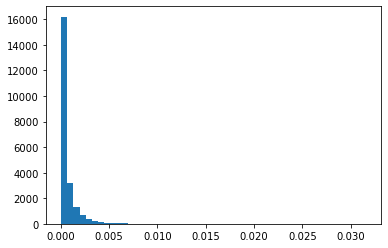

In [56]:
plt.hist(list(degree_cent.values ()), 50);
plt.ylabel('Degree Centrality');
plt.xlabel('Number of Nodes');

In [ ]:
sorted(degree_cent.items (), reverse = True, key = lambda x: x[1])[0:5]

# Subgraphs

How many connected components are in the graph

In [23]:
CCs = sorted(nx.connected_components(graph),key=len, reverse=True)

len(CCs)

1

[(16895, 0.0315545863189283),
 (19743, 0.030174907650540747),
 (21729, 0.029329298144109662),
 (14497, 0.028928746272642306),
 (1387, 0.022430904802171883)]

In [20]:
graph.nodes(data=True)[16895]

{'page_name': 'U.S. Army'}

Ego-networks are subnetworks of neighbors that are centered on a certain node. By setting the raduis, we can find nodes with a maximum distance to a node

In [31]:
subgraph  = nx.ego_graph(graph, 16895, radius = 2)

print(nx.info(subgraph))

Name: Facebook
Type: Graph
Number of nodes: 4076
Number of edges: 57294
Average degree:  28.1129


Find the community

In [32]:
partition = community.best_partition(subgraph)

In [33]:
N = max(partition.values())
N

11

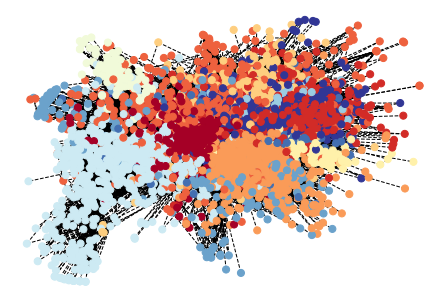

In [35]:
pos = nx.spring_layout(subgraph)

nx.draw(subgraph, pos, node_size=50, node_color=list(partition.values()), cmap=plt.cm.RdYlBu,style = 'dashed')

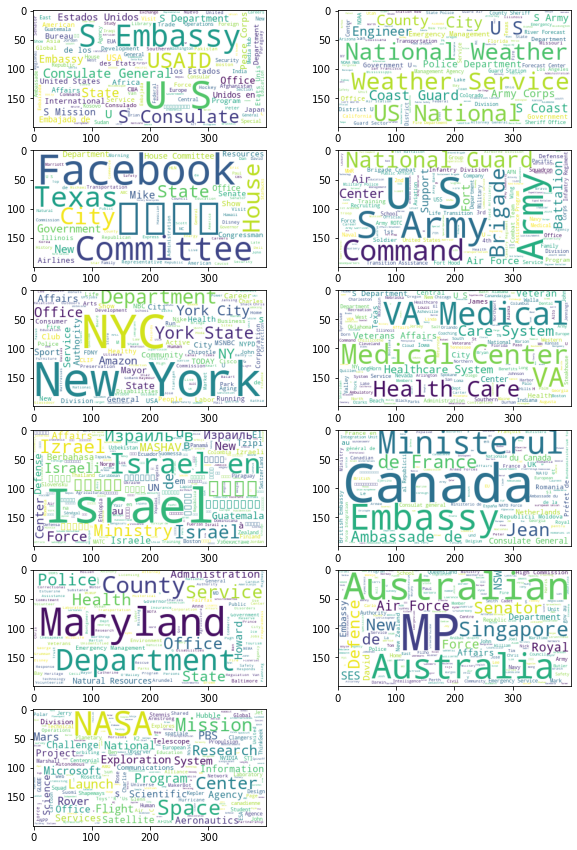

In [40]:
fig = plt.figure(figsize=(10,15))
for k in range(0,N):
    
    plt.subplot(6,2,k+1)
    
    m=[i for i in subgraph.nodes if partition[i]==k]
    text = " ".join([graph.nodes[i]['page_name'] for i in m] )  
    wordcloud = WordCloud(background_color="white").generate(text)
    plt.imshow(wordcloud)  